In [2]:
# Things to try:
#   - Convert the string values to numbers none=1, light=3, heavy=4 etc, same for other columns
#   - dropnas, what happens if you fill them with mean values, high values, low values etc.
#   - try to see which columns make the most impact, remove others see any differences?
#   - using a predictive model can you predict what the missing values are?
#   - show pregnancies chart just for women
#   - find acceptable bmi ranges, some could be wrong.
#   -
#   -

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

In [4]:
df = pd.read_csv("../CSV/diabetes_data.csv")
# To display the top 5 rows 
df.head(5)   

,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,female,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,Occasionally,Sedentary,1.5,Low,NaN,light,1.0
1,male,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,1.0
2,female,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,Occasionally,Lightly Active,7.6,Low,0.0,light,1.0
3,female,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,Sedentary,7.7,Low,1.0,heavy,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,Occasionally,Sedentary,7.8,NaN,0.0,heavy,1.0


In [5]:
df.shape

(100000, 16)

In [6]:
df.dtypes

gender                         object
age                           float64
hypertension                  float64
diabetes_pedigree_function    float64
diet_type                      object
star_sign                      object
BMI                           float64
weight                        float64
family_diabetes_history       float64
social_media_usage             object
physical_activity_level        object
sleep_duration                float64
stress_level                   object
pregnancies                   float64
alcohol_consumption            object
diabetes                      float64
dtype: object

In [7]:
dup_df = df[df.duplicated()]
print("Number of duplicate rows: ", dup_df.shape) # no duplicated rows

Number of duplicate rows:  (0, 16)


In [8]:
df.count()

gender                        79954
age                           80145
hypertension                  80169
diabetes_pedigree_function    80120
diet_type                     79939
star_sign                     79806
BMI                           79934
weight                        80126
family_diabetes_history       79863
social_media_usage            79968
physical_activity_level       80032
sleep_duration                80063
stress_level                  80024
pregnancies                   80033
alcohol_consumption           79896
diabetes                      80242
dtype: int64

In [9]:
# average number of missing values per column
cols = list(df)
for col in cols:
    print(f"{col}: {round(((df[col].count() / df.shape[0])*100),2)}%")

gender: 79.95%
age: 80.14%
hypertension: 80.17%
diabetes_pedigree_function: 80.12%
diet_type: 79.94%
star_sign: 79.81%
BMI: 79.93%
weight: 80.13%
family_diabetes_history: 79.86%
social_media_usage: 79.97%
physical_activity_level: 80.03%
sleep_duration: 80.06%
stress_level: 80.02%
pregnancies: 80.03%
alcohol_consumption: 79.9%
diabetes: 80.24%


In [10]:
print(df.isnull().sum())

gender                        20046
age                           19855
hypertension                  19831
diabetes_pedigree_function    19880
diet_type                     20061
star_sign                     20194
BMI                           20066
weight                        19874
family_diabetes_history       20137
social_media_usage            20032
physical_activity_level       19968
sleep_duration                19937
stress_level                  19976
pregnancies                   19967
alcohol_consumption           20104
diabetes                      19758
dtype: int64


In [11]:
dropped_df = df.dropna()
dropped_df.count()

gender                        2893
age                           2893
hypertension                  2893
diabetes_pedigree_function    2893
diet_type                     2893
star_sign                     2893
BMI                           2893
weight                        2893
family_diabetes_history       2893
social_media_usage            2893
physical_activity_level       2893
sleep_duration                2893
stress_level                  2893
pregnancies                   2893
alcohol_consumption           2893
diabetes                      2893
dtype: int64

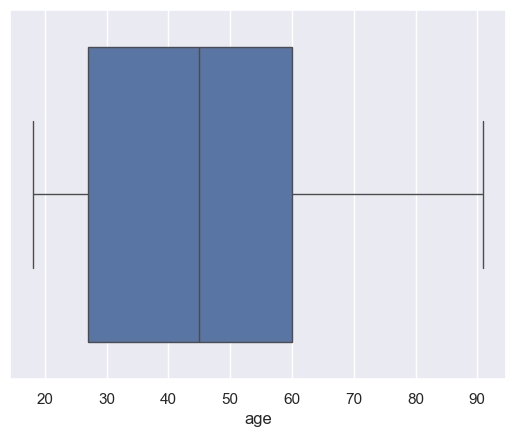

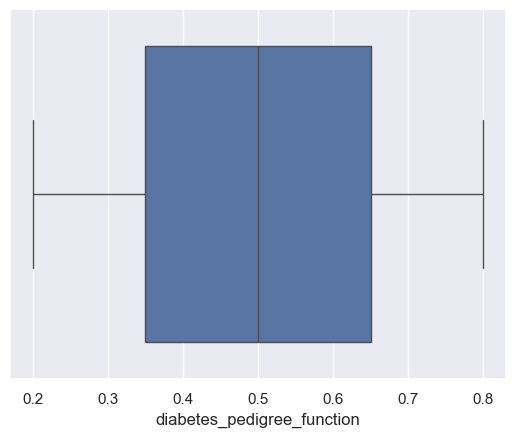

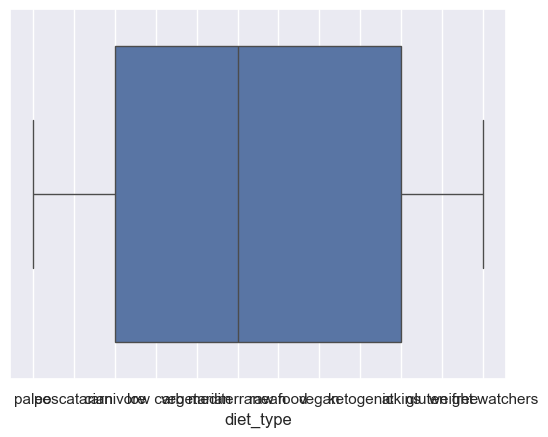

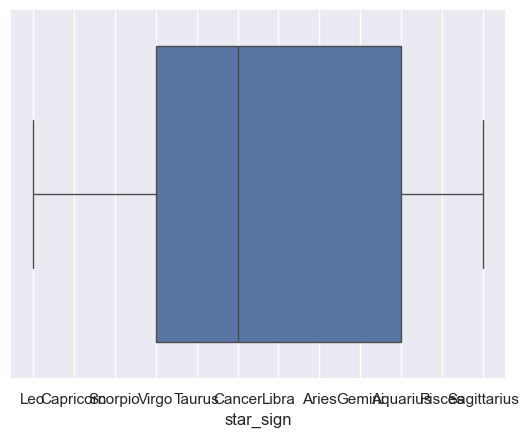

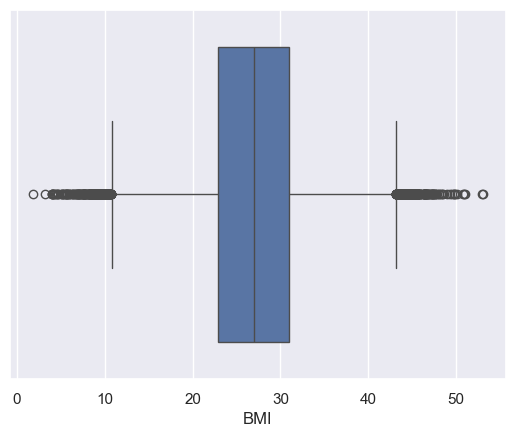

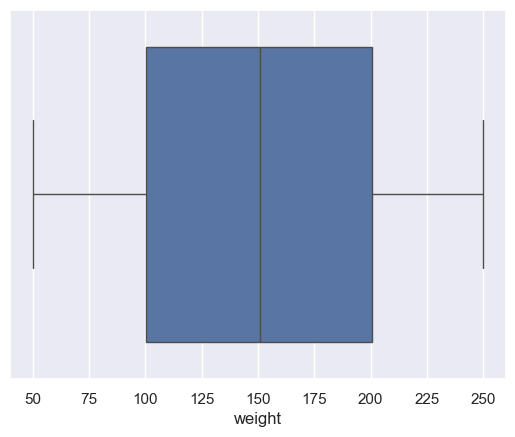

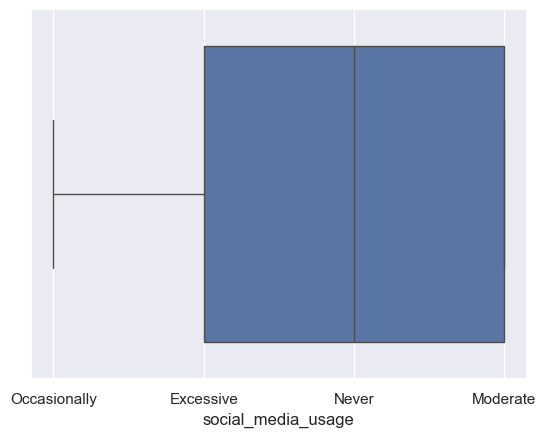

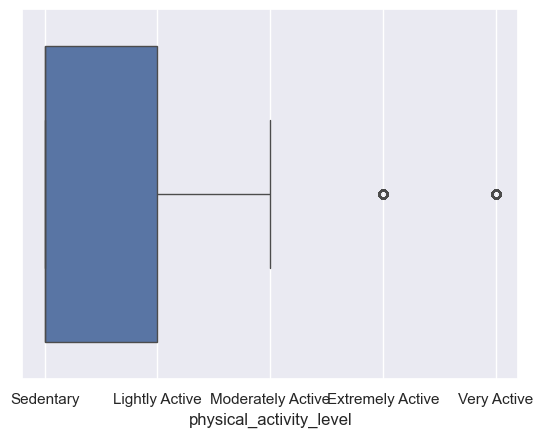

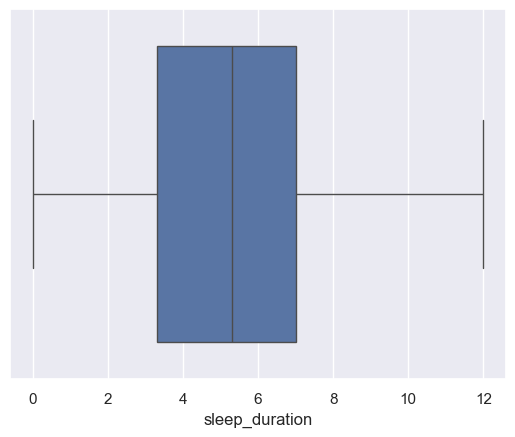

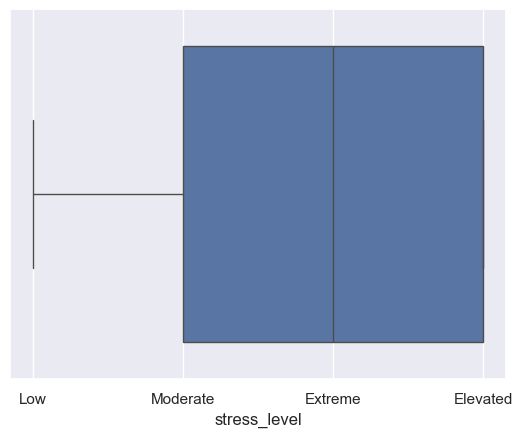

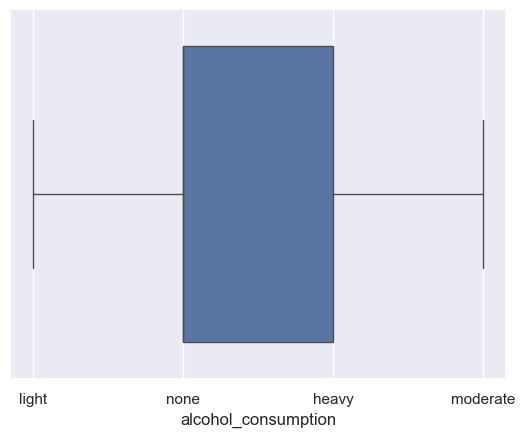

In [12]:
remove_cols = ['gender', 'hypertension', 'diabetes', 'pregnancies', 'family_diabetes_history'] # removing bool columns
plot_df = df.drop(columns=remove_cols)
cols = list(plot_df)

for col in cols:
    plt.figure()
    sns.boxplot(x=plot_df[col])

<Axes: xlabel='pregnancies'>

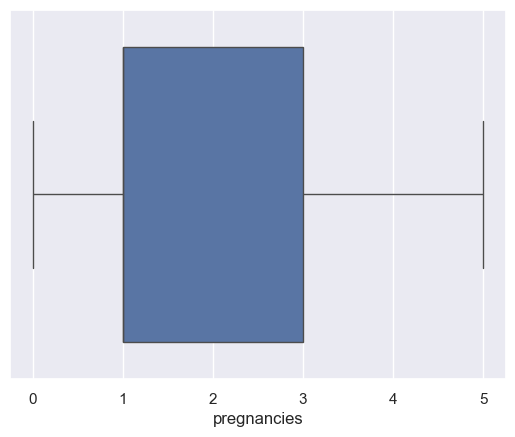

In [18]:
f_df = df[df.gender == 'female']
sns.boxplot(x=f_df['pregnancies'])

<Axes: xlabel='pregnancies'>

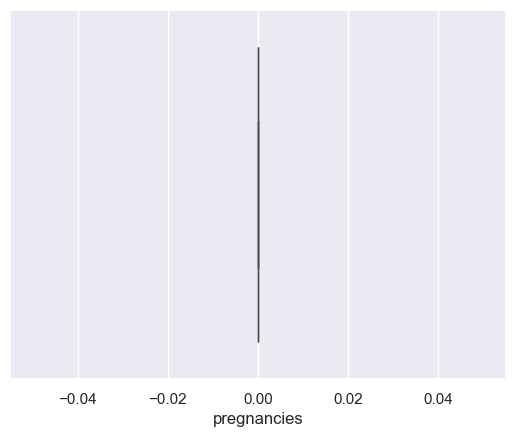